In [37]:
#The imports required for the whole project
import pandas as pd
import numpy as np
import os
import openpyxl 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
#The function changes the excel file to dataframe

def excel_to_df(excel_file: str, sheet_name: str = None) -> pd.DataFrame:

    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
    )
    
    df = df.convert_dtypes()
    
    return df

In [4]:
#Using the function to transform the actual excel into a df called xl_df
xl_df = excel_to_df("MEHOINUSA672N.xlsx", sheet_name="Annual")

xl_df.head()

,observation_date,mehoinusa672n
0,1984-01-01,60420
1,1985-01-01,61570
2,1986-01-01,63850
3,1987-01-01,64650
4,1988-01-01,65130


In [5]:
#Using pandas built in functions to transform a csv to a df called csv_df
csv_df = pd.read_csv("Real_Estate_Sales_2001-2023_GL.csv", encoding="utf-8")
csv_df.head(3)

C:\Users\chris\AppData\Local\Temp\ipykernel_21772\2051857402.py:2: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_df = pd.read_csv("Real_Estate_Sales_2001-2023_GL.csv", encoding="utf-8")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN


In [6]:
#Checking all columns titles
xl_df.columns

Index(['observation_date', 'mehoinusa672n'], dtype='object')

In [7]:
#Checking all columns titles
csv_df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [8]:
#Changing the dates into the same format for both dataframes as well as renaming a few columns
csv_df["Date Recorded"] = pd.to_datetime(csv_df["Date Recorded"], format="%m/%d/%Y", errors="coerce")
xl_df["observation_date"] = pd.to_datetime(xl_df["observation_date"], errors="coerce")
xl_df["Year"] = xl_df["observation_date"].dt.year
csv_df = csv_df.rename(columns={"List Year": "Year"})

In [9]:
# just checking the data
csv_df.head(2)

,Serial Number,Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN


In [10]:
#Merge the two datasets based of the year with left join
merged_df = csv_df.merge(
    xl_df[["Year", "mehoinusa672n"]],
    on="Year",
    how="left"
)

In [11]:
#Check the data
merged_df.head(4)

,Serial Number,Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,mehoinusa672n
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014),81580
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN,81580
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN,81580
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN,81580


In [12]:
#Sorting out which columns are needed and not needed and then sorting by year
merged_df["Date"] = merged_df["Date Recorded"]
merged_df = merged_df.drop(columns=["Non Use Code", "Assessor Remarks", "OPM remarks", "Location", "Date Recorded"])
merged_df = merged_df.sort_values("Year")

In [13]:
# Since we are mostly focusing on pre an during covid, we will be focusing only on 2015 to 2023
filtered_df = merged_df[(merged_df["Year"] >= 2015) & (merged_df["Year"] <= 2023)]

In [15]:
#Checking the data
filtered_df.head()

,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
827798,150096,2015,Milford,61 SPICE BUSH LN,317600.0,235500.0,1.34862,Condo,Condo,72790,2016-08-31
828446,150854,2015,Waterbury,14 JODIE CIRCLE,69830.0,75900.0,0.920026,Single Family,Single Family,72790,2016-05-02
828068,15456,2015,Hartford,113-115 BURNHUM ST,49733.0,103950.0,0.478432,Two Family,Two Family,72790,2016-04-28
828440,150310,2015,Cheshire,1281 AVON BOULEVARD,144080.0,223000.0,0.646099,Single Family,Single Family,72790,2016-06-17
828032,150043,2015,Middlebury,250 WHITE DEER ROCK RD,331800.0,480000.0,0.69125,Single Family,Single Family,72790,2016-01-08


In [16]:
#Checking size of the df
filtered_df.shape

(462879, 11)

In [ ]:
#Checking how many rows have missing data
missing_rows = filtered_df[filtered_df.isna().any(axis=1)]
print(missing_rows.shape)
missing_rows.head(2)

(41212, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
828038,150027,2015,Litchfield,TALLMADGE LANE,127730.0,250000.0,0.51092,NaN,NaN,72790,2015-11-25
828583,150185,2015,Cromwell,46 PASCO HILL ROAD,117480.0,127500.0,0.921412,NaN,NaN,72790,2016-06-16


In [18]:
#Check if any columns have no values
filtered_df.isna().any()

Serial Number       False
Year                False
Town                False
Address              True
Assessed Value      False
Sale Amount         False
Sales Ratio         False
Property Type        True
Residential Type     True
mehoinusa672n       False
Date                 True
dtype: bool

In [19]:
#Find the amount of data that is missing on both columns
print(filtered_df[filtered_df["Property Type"].isna() & filtered_df["Residential Type"].isna()].shape)
filtered_df[filtered_df["Property Type"].isna() & filtered_df["Residential Type"].isna()].head(2)

(20525, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
828038,150027,2015,Litchfield,TALLMADGE LANE,127730.0,250000.0,0.51092,NaN,NaN,72790,2015-11-25
828583,150185,2015,Cromwell,46 PASCO HILL ROAD,117480.0,127500.0,0.921412,NaN,NaN,72790,2016-06-16


In [20]:
#Final cleaning step and we dropped the missing values
Cleaned_Df = filtered_df.dropna(subset=["Property Type", "Residential Type"], how="all")

In [21]:
#Check data
print(Cleaned_Df.shape)
Cleaned_Df.head(2)

(442354, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
827798,150096,2015,Milford,61 SPICE BUSH LN,317600.0,235500.0,1.34862,Condo,Condo,72790,2016-08-31
828446,150854,2015,Waterbury,14 JODIE CIRCLE,69830.0,75900.0,0.920026,Single Family,Single Family,72790,2016-05-02


In [23]:
#Index for CPI,  created new df just based of the CPI

cpi_dict = {
    2015: 237.017,
    2016: 240.007,
    2017: 245.120,
    2018: 251.107,
    2019: 255.657,
    2020: 258.811,
    2021: 270.970,
    2022: 292.655,
    2023: 305.109
}

cpi_df = pd.DataFrame(list(cpi_dict.items()), columns=['year', 'cpi'])


In [24]:
#New merged with cleaned and cpi 

adj_df = Cleaned_Df.merge(cpi_df, left_on='Year', right_on='year', how='left')

In [25]:
#

cpi_2023 = cpi_dict[2023]

adj_df['price_2023'] = adj_df['Sale Amount'] * (cpi_2023 / adj_df['cpi'])

In [26]:
#

mean_price_year = (
    adj_df.groupby('Year')['price_2023']
          .mean()
          .reset_index()
          .rename(columns={'price_2023': 'mean_residential_price_2023usd'})
)



In [27]:
#

adj_df = adj_df.merge(mean_price_year, on='Year', how='left')
adj_df.shape

(442354, 15)

In [28]:
# Create final year-level dataset
final_year_df = (
    adj_df.groupby('Year')
          .agg({
              'price_2023': 'mean',            # mean inflation-adjusted home price
              'Sale Amount': 'mean',           # mean nominal (raw) home price
              'mehoinusa672n': 'mean'          # median household income
          })
          .reset_index()
)

final_year_df = final_year_df.rename(columns={
    'price_2023': 'mean_residential_price_2023usd',
    'Sale Amount': 'mean_raw_sale_amount',
    'mehoinusa672n': 'median_household_income'
})

final_year_df


,Year,mean_residential_price_2023usd,mean_raw_sale_amount,median_household_income
0,2015,366472.458068,284685.809313,72790.0
1,2016,496265.109321,390375.571002,75380.0
2,2017,431304.933886,346503.922841,76710.0
3,2018,384485.958065,316434.833033,77700.0
4,2019,448879.236188,376124.987745,83260.0
5,2020,713194.454130,604972.550360,81580.0
6,2021,604627.690901,536975.197072,81270.0
7,2022,581484.881788,557749.715937,79500.0
8,2023,538314.328200,538314.328200,82690.0


In [ ]:
#Yearly Percent Change 

pct_change_df = final_year_df.set_index("Year").pct_change() * 100
pct_change_df

,mean_residential_price_2023usd,mean_raw_sale_amount,median_household_income
Year,,,
2015,NaN,NaN,<NA>
2016,35.416755,37.125054,3.558181
2017,-13.089813,-11.238318,1.764394
2018,-10.855191,-8.677850,1.290575
2019,16.747888,18.863333,7.155727
2020,58.883369,60.843488,-2.017776
2021,-15.222603,-11.239742,-0.379995
2022,-3.827613,3.868804,-2.177925
2023,-7.424192,-3.484607,4.012579


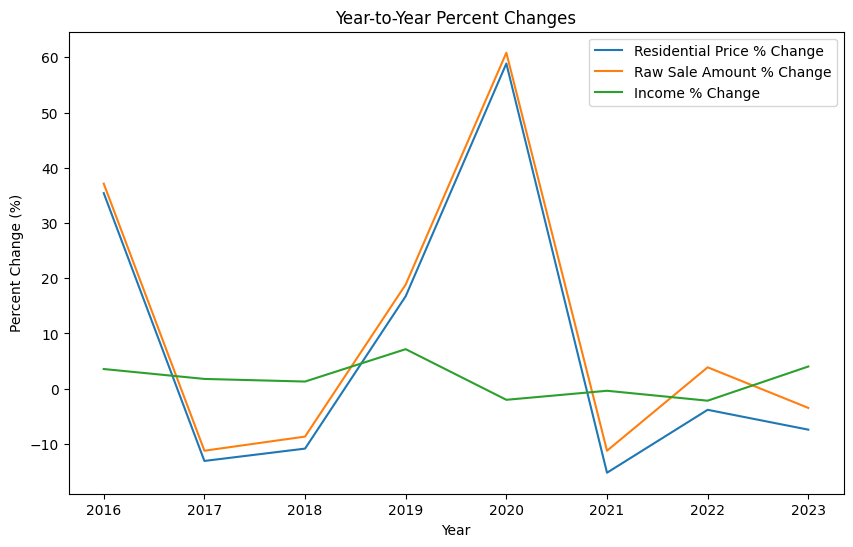

In [ ]:
#Percent Change Graph
pct_df = final_year_df.set_index("Year").pct_change() * 100

plt.figure(figsize=(10,6))
plt.plot(pct_df.index, pct_df["mean_residential_price_2023usd"], label="Residential Price % Change")
plt.plot(pct_df.index, pct_df["mean_raw_sale_amount"], label="Raw Sale Amount % Change")
plt.plot(pct_df.index, pct_df["median_household_income"], label="Income % Change")

plt.xlabel("Year")
plt.ylabel("Percent Change (%)")
plt.title("Year-to-Year Percent Changes")
plt.legend()
plt.show()

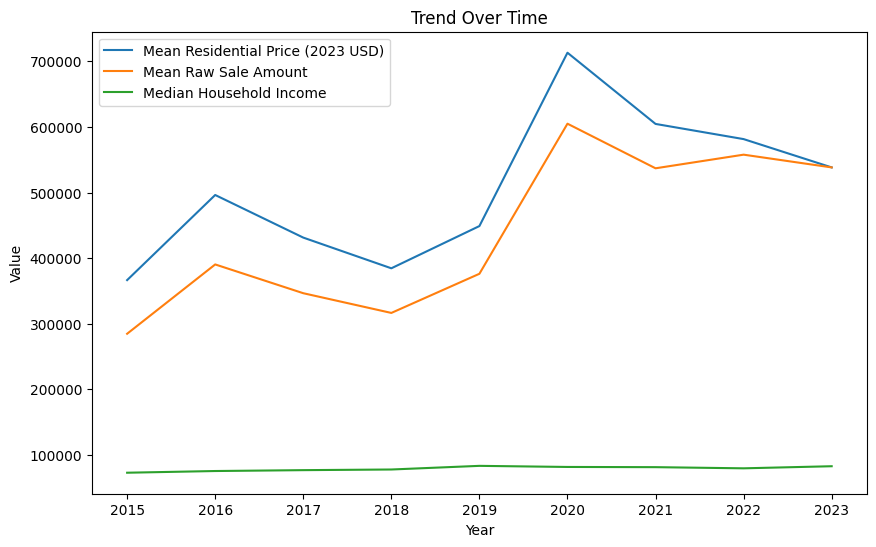

In [ ]:
#Trend Over Time
plt.figure(figsize=(10,6))
plt.plot(final_year_df["Year"], final_year_df["mean_residential_price_2023usd"], label="Mean Residential Price (2023 USD)")
plt.plot(final_year_df["Year"], final_year_df["mean_raw_sale_amount"], label="Mean Raw Sale Amount")
plt.plot(final_year_df["Year"], final_year_df["median_household_income"], label="Median Household Income")

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Trend Over Time")
plt.legend()
plt.show()

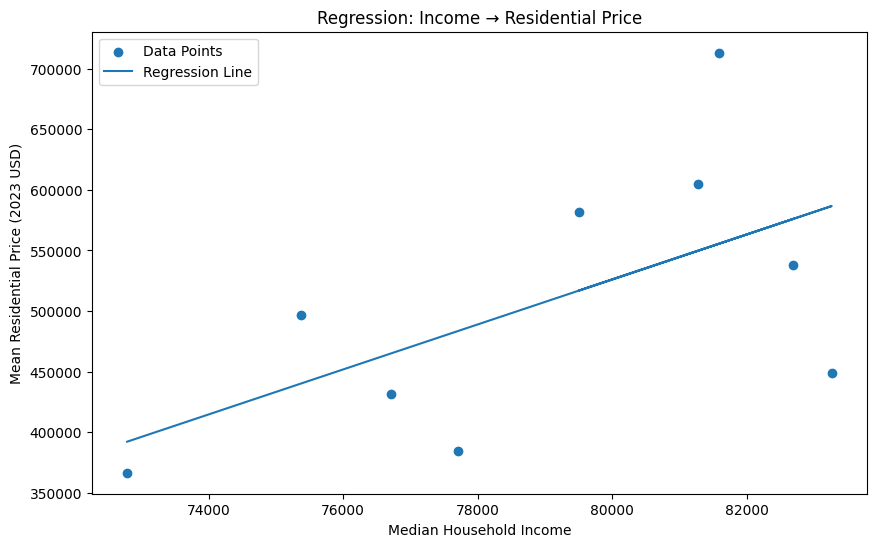

Slope: 18.579314981810274
Intercept: -960292.7093025732


In [ ]:
#Regression Model
#Each dot on the graph is a year 
#Use mean because that is the data we want to explain
#Use median because of its earning
X = final_year_df[["median_household_income"]]
y = final_year_df["mean_residential_price_2023usd"]

model = LinearRegression()
model.fit(X, y)

pred_line = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Data Points")
plt.plot(X, pred_line, label="Regression Line")

plt.xlabel("Median Household Income")
plt.ylabel("Mean Residential Price (2023 USD)")
plt.title("Regression: Income → Residential Price")
plt.legend()
plt.show()

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

In [ ]:
#Slope = 18.579314981810274
#For every $1 increase in median household income, the mean residential price increases by ~$18.58
#This aligns with a moderate positive relationship.

In [38]:
X = final_year_df[['median_household_income']]
y = final_year_df['mean_residential_price_2023usd']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print("R²:", r2)

R²: 0.34474620941731093


In [ ]:
#Income explains some of the variation in housing price, but there are clearly other major drivers, especially in 2020